In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [45]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

In [5]:
df=pd.read_csv("/content/survey lung cancer.csv")

In [6]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [8]:
df.shape

(309, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [10]:
#Checking for Duplicates
df.duplicated().sum()

33

In [11]:
#Removing Duplicates
df=df.drop_duplicates()

In [12]:
#Checking for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [13]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [15]:
# Mapping numeric values to non-numeric values

df['GENDER'] = df['GENDER'].map({'F': 0, 'M': 1})

df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

In [16]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    i

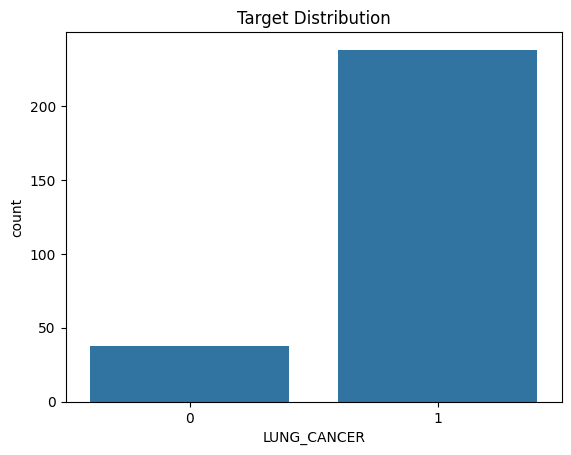

In [18]:
#Let's check the distributaion of Target variable.
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');

In [19]:
df['LUNG_CANCER'].value_counts()

1    238
0     38
Name: LUNG_CANCER, dtype: int64

<Axes: >

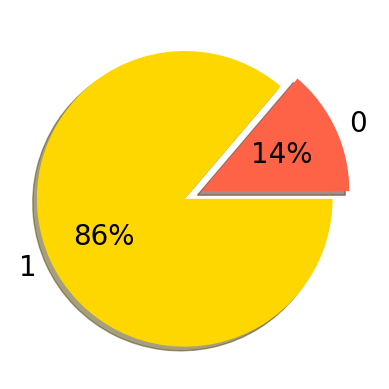

In [20]:
df.groupby('LUNG_CANCER').size().plot(kind='pie',  textprops={'fontsize': 20},autopct='%1.0f%%',explode=[0.05,0.075],shadow=True,
                                  colors=['tomato', 'gold', 'skyblue'])

In [24]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='GENDER'>

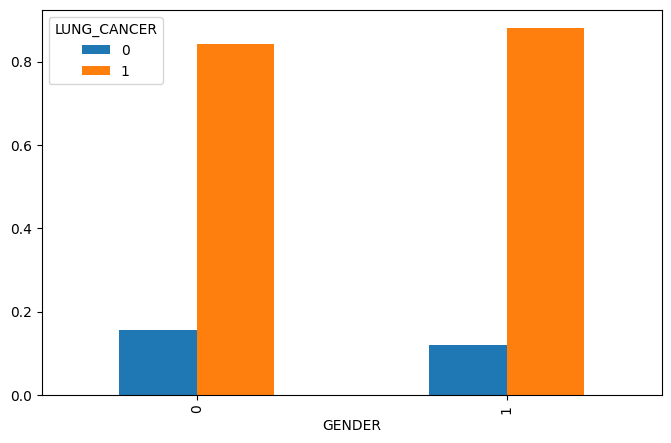

In [25]:
plot('GENDER')

<Axes: xlabel='AGE'>

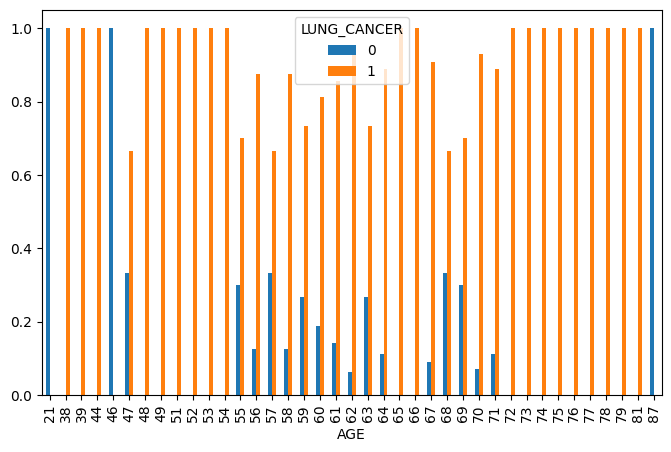

In [26]:
plot('AGE')


<Axes: xlabel='SMOKING'>

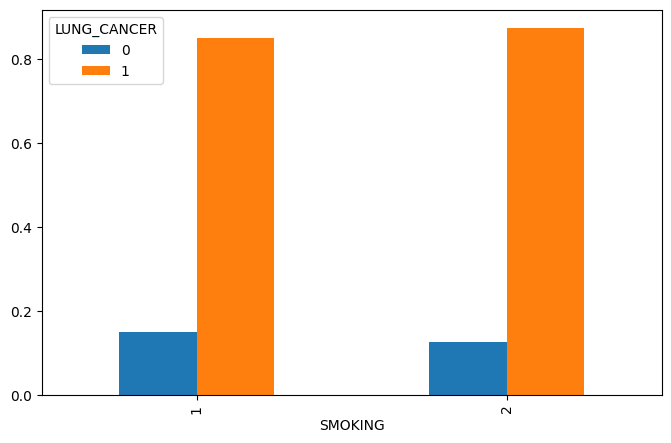

In [27]:
plot('SMOKING')

<Axes: xlabel='YELLOW_FINGERS'>

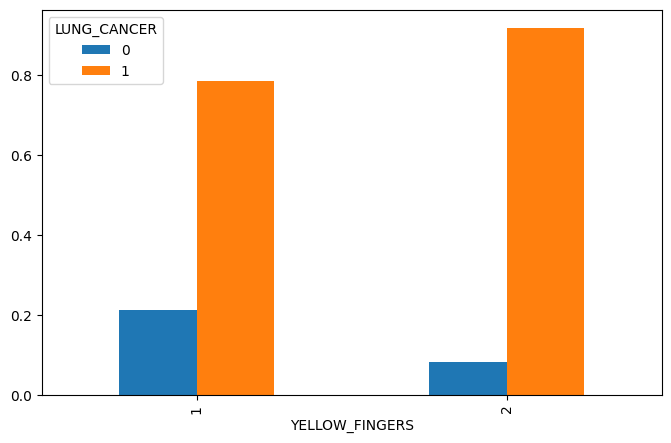

In [28]:
plot('YELLOW_FINGERS')

<Axes: xlabel='ANXIETY'>

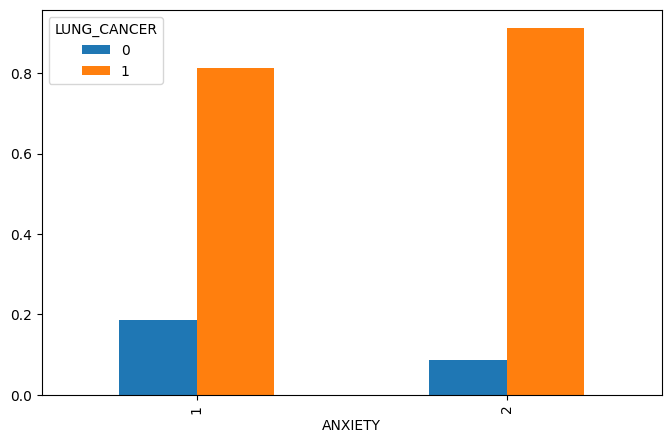

In [29]:
plot('ANXIETY')

<Axes: xlabel='PEER_PRESSURE'>

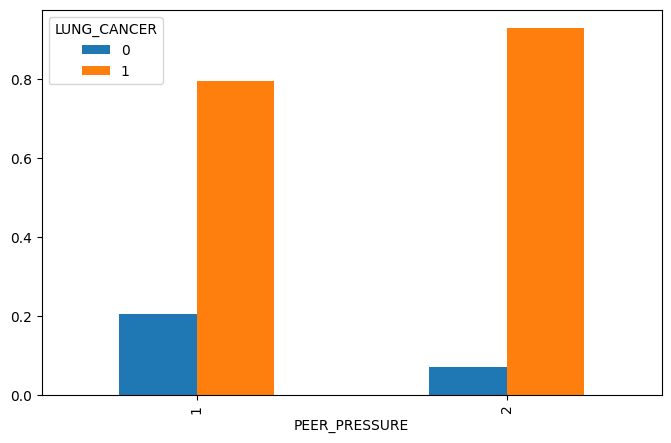

In [30]:
plot('PEER_PRESSURE')

<Axes: xlabel='CHRONIC DISEASE'>

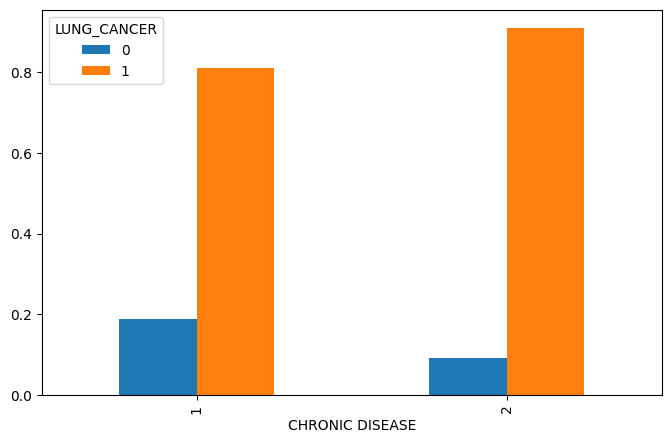

In [31]:
plot('CHRONIC DISEASE')

<Axes: xlabel='FATIGUE '>

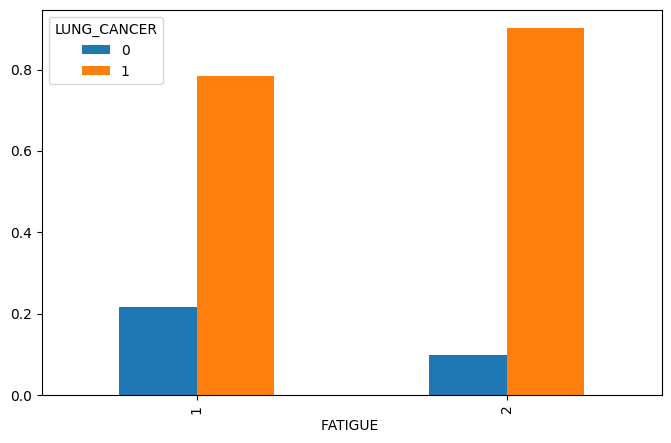

In [32]:
plot('FATIGUE ')

<Axes: xlabel='ALLERGY '>

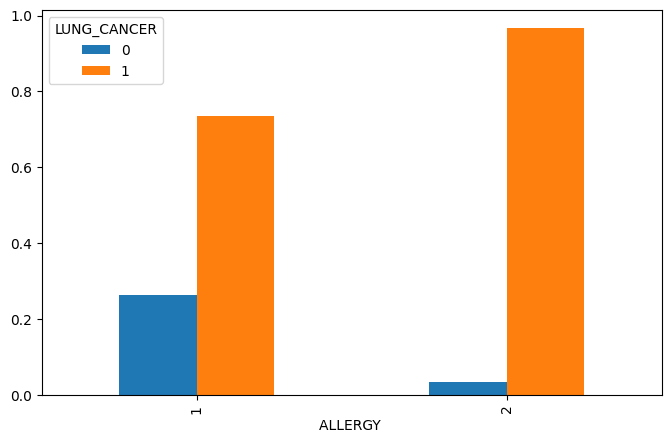

In [33]:
plot('ALLERGY ')

<Axes: xlabel='WHEEZING'>

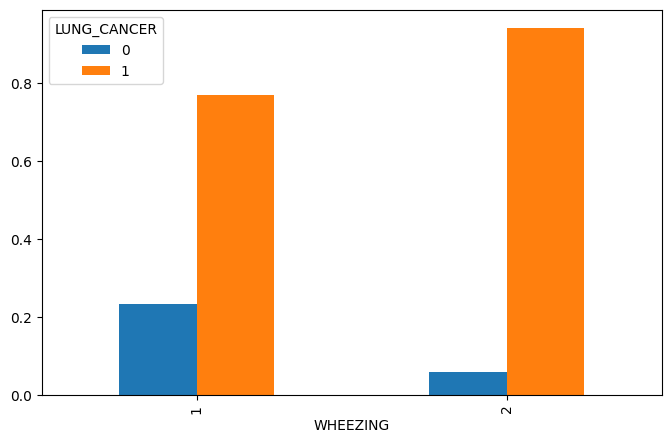

In [34]:
plot('WHEEZING')

<Axes: xlabel='ALCOHOL CONSUMING'>

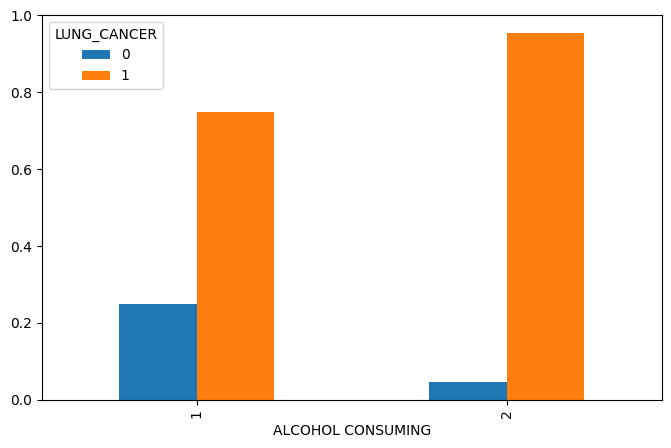

In [35]:
plot('ALCOHOL CONSUMING')

<Axes: xlabel='COUGHING'>

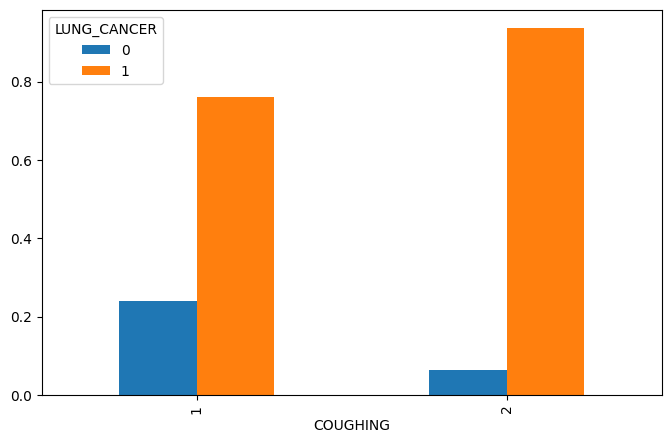

In [36]:
plot('COUGHING')

<Axes: xlabel='SHORTNESS OF BREATH'>

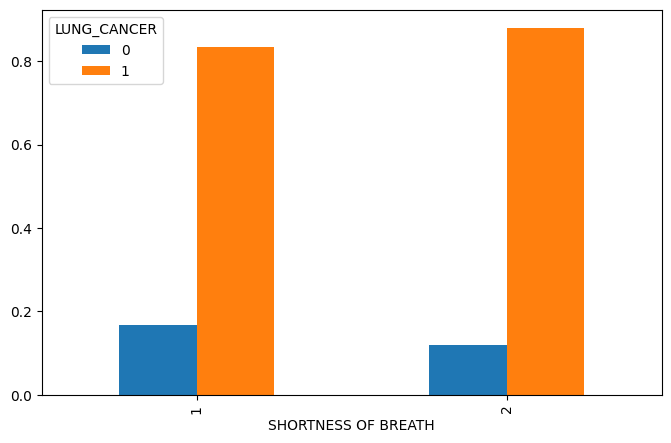

In [37]:
plot('SHORTNESS OF BREATH')

<Axes: xlabel='SWALLOWING DIFFICULTY'>

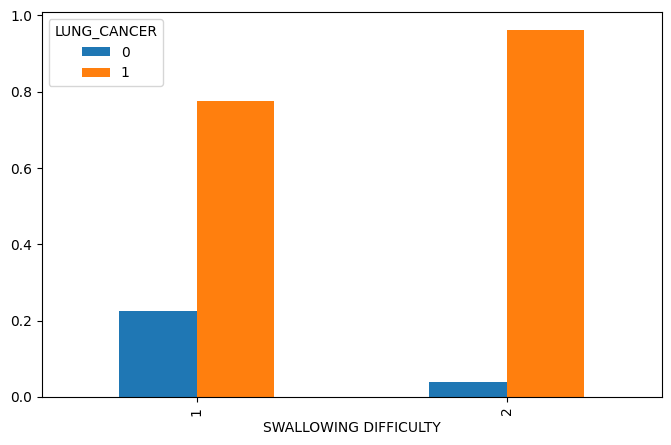

In [38]:
plot('SWALLOWING DIFFICULTY')

<Axes: xlabel='CHEST PAIN'>

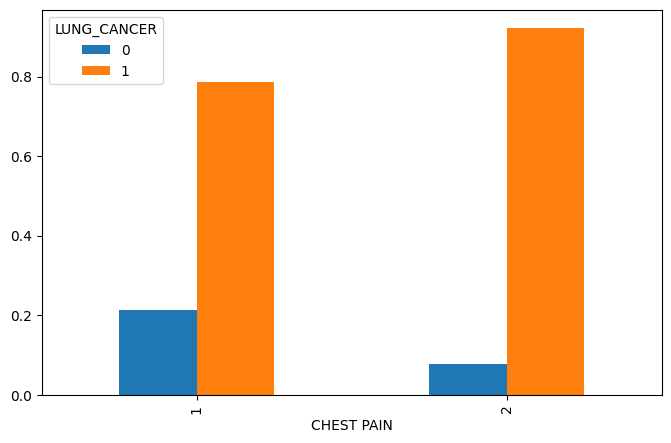

In [39]:
plot('CHEST PAIN')

In [40]:
#Finding Correlation
cn=df.corr()
cn

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,-0.013120,0.041131,-0.202506,-0.152032,-0.261427,-0.189925,-0.079020,0.150174,0.121047,0.434264,0.120228,-0.052893,-0.048959,0.361547,0.053666
AGE,-0.013120,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806,0.106305
SMOKING,0.041131,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984,0.034878
YELLOW_FINGERS,-0.202506,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169,0.189192
ANXIETY,-0.152032,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,0.144322
PEER_PRESSURE,-0.261427,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655,0.195086
CHRONIC DISEASE,-0.189925,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895,0.143692
FATIGUE,-0.079020,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757,0.160078
ALLERGY,0.150174,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440,0.333552
WHEEZING,0.121047,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846,0.249054


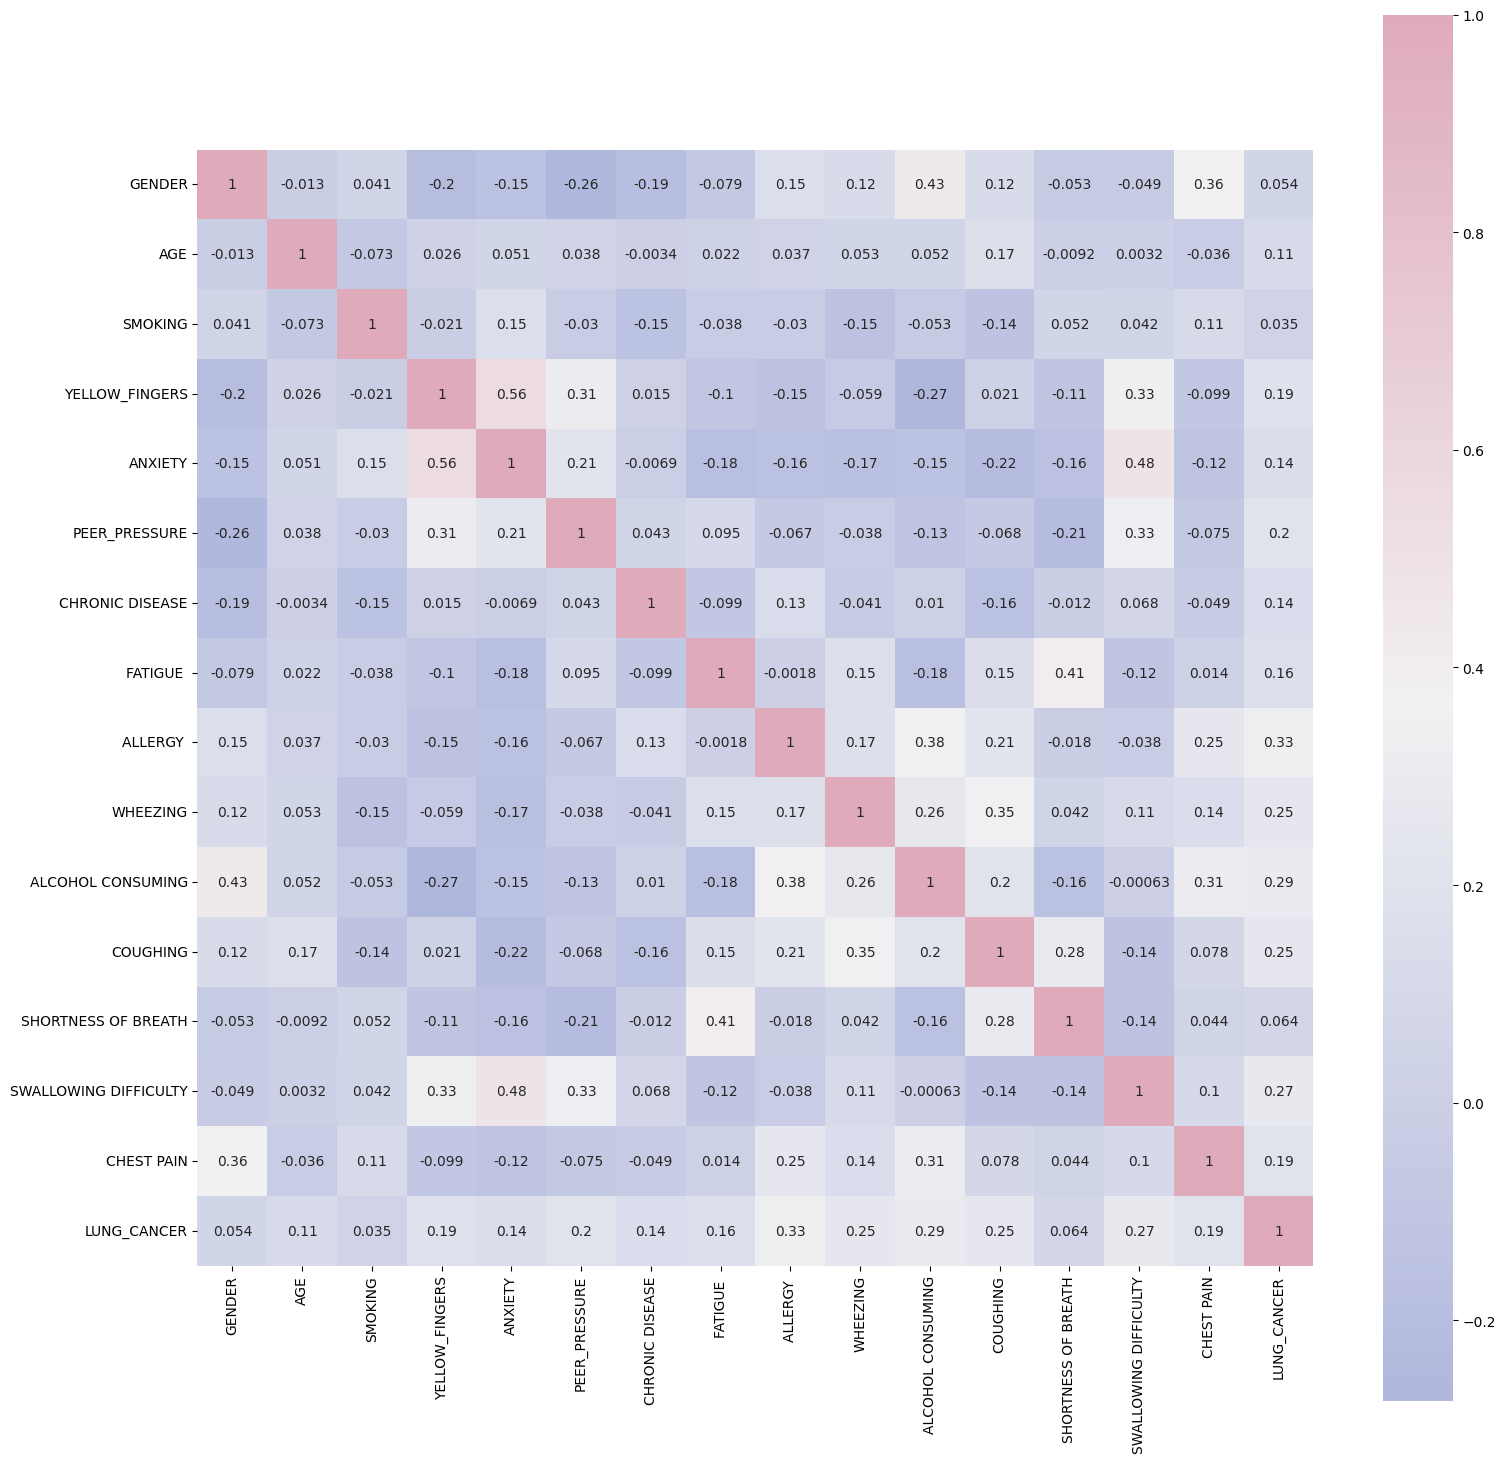

In [42]:
#Correlation
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

In [49]:
#Splitting independent and dependent variables
x = df.drop('LUNG_CANCER', axis = 1)
y = df['LUNG_CANCER']

In [78]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [82]:
#Fitting training data to the model by Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [83]:
#Predicting result using testing data
preds= dt_model.predict(x_test)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [84]:
#Model accuracy
from sklearn.metrics import accuracy_score
accuracy =accuracy_score(y_test, preds)
accuracy

0.891566265060241

In [75]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [86]:
#Predicting result using testing data#
y_rf_pred= rf_model.predict(x_test)
y_rf_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [87]:
randomforest_accuracy =accuracy_score(y_test, y_rf_pred)

In [88]:
randomforest_accuracy

0.9879518072289156

In [92]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=15,  activation='relu')) #1st layer
model.add(Dense(8,  activation='relu')) #2nd layer
model.add(Dense(4,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid'))

In [93]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [110]:
# Fit the model
history = model.fit(x, y, validation_split=0.33, epochs=100, batch_size=50)

Epoch 1/100
4/4 [==============================] - 0s 20ms/step - loss: 0.2248 - accuracy: 0.9022 - val_loss: 0.3077 - val_accuracy: 0.8804
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2251 - accuracy: 0.9022 - val_loss: 0.3077 - val_accuracy: 0.8804
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2250 - accuracy: 0.9022 - val_loss: 0.3073 - val_accuracy: 0.8804
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2290 - accuracy: 0.9076 - val_loss: 0.3092 - val_accuracy: 0.8804
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2254 - accuracy: 0.9022 - val_loss: 0.3074 - val_accuracy: 0.8804
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2246 - accuracy: 0.8967 - val_loss: 0.3075 - val_accuracy: 0.8804
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2250 - accuracy: 0.8967 - val_loss: 0.3076 - val_accuracy: 0.8804
Epoch 8/100
4/4 [=======

In [111]:
# evaluate the model
scores = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

9/9 [==============================] - 0s 1ms/step - loss: 0.2466 - accuracy: 0.8986
accuracy: 89.86%


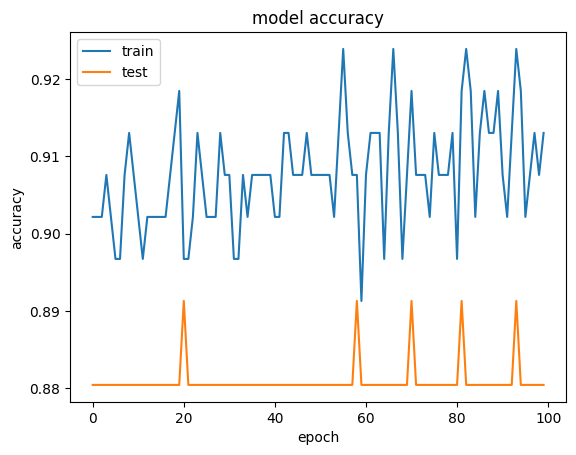

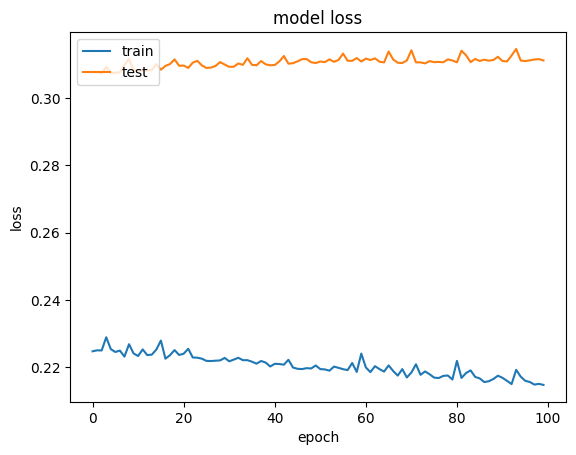

In [112]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()